In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def arrival(lamda):
    #This is a Bernoulli random variable with success probability lambda
    return np.random.choice([0,1], p=[1-lamda, lamda])

def service(mu):
    #This is a Bernoulli random variable with success probability mu
    return np.random.choice([0,1], p=[1-mu, mu])

In [16]:
mu = 0.9
T = 10000 #total time
#queue length = number of packets in the queue at any time
#sojourn time = time spent in queue + time spent in service
lamda_range = np.arange(0.1, 1.1, 0.1)
average_q = []
average_sojourn_time = []

for lamda in lamda_range:
    ql = 0 #queue length
    q = [] #queue length at each time instant just before the arrival
    q.append(0)
    arrival_times = []
    service_times = []
    sojourn_times = []
    t = 1

    while t < T:
        if arrival(lamda):
            ql += 1
            arrival_times.append(t)
        if service(mu):
            if(ql!=0):
                ql-=1
                service_times.append(t)
        q.append(ql)
        t += 1

    average_q.append(np.mean(q))
    for i in range(len(service_times)): #computing only for those who have been served
        sojourn_times.append(service_times[i] - arrival_times[i])
    average_sojourn_time.append(np.mean(sojourn_times))



Average values of queue length vs lamda:
lamda =  0.1 : 0.0132
lamda =  0.2 : 0.0267
lamda =  0.3 : 0.0484
lamda =  0.4 : 0.0837
lamda =  0.5 : 0.1307
lamda =  0.6 : 0.2203
lamda =  0.7 : 0.3396
lamda =  0.8 : 0.824
lamda =  0.9 : 18.8372
lamda =  1.0 : 524.8979


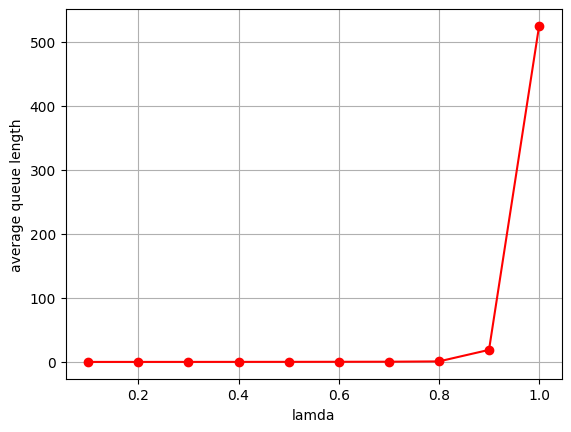

In [17]:

print("Average values of queue length vs lamda:")
for i in range(1, len(average_q)+1):
    print("lamda = ", i/10, ":", average_q[i-1])

plt.plot(lamda_range, average_q, 'ro-')
plt.xlabel('lamda')
plt.ylabel('average queue length')
plt.grid()
plt.show()


Average sojourn time vs lamda:
lamda =  0.1 : 0.13510747185261002
lamda =  0.2 : 0.13303437967115098
lamda =  0.3 : 0.16340310600945307
lamda =  0.4 : 0.20987963891675024
lamda =  0.5 : 0.2595313741064337
lamda =  0.6 : 0.3596147567744042
lamda =  0.7 : 0.481838819523269
lamda =  0.8 : 1.031031031031031
lamda =  0.9 : 20.87391304347826
lamda =  1.0 : 525.4670164080812


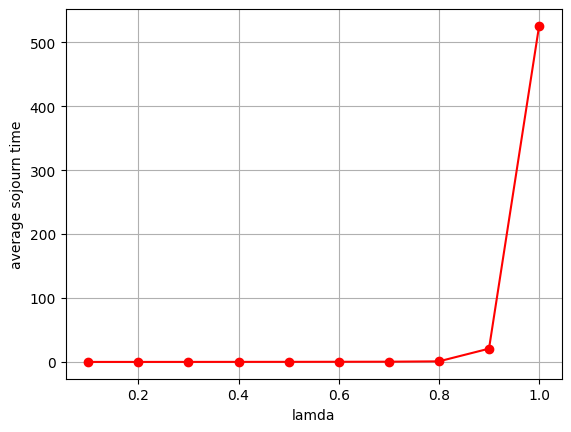

In [18]:

print("Average sojourn time vs lamda:")
for i in range(1, len(average_sojourn_time)+1):
    print("lamda = ", i/10, ":", average_sojourn_time[i-1])
plt.plot(lamda_range, average_sojourn_time, 'ro-')
plt.xlabel('lamda')
plt.ylabel('average sojourn time')
plt.grid()
plt.show()


Ratio of average queue length and average sojourn time vs lamda:
lamda =  0.1 : 0.09770000000000001
lamda =  0.2 : 0.20070000000000002
lamda =  0.3 : 0.2962
lamda =  0.4 : 0.3988
lamda =  0.5 : 0.5036
lamda =  0.6 : 0.6125999999999999
lamda =  0.7 : 0.7048
lamda =  0.8 : 0.7991999999999999
lamda =  0.9 : 0.90242782753593
lamda =  1.0 : 0.9989169321949616


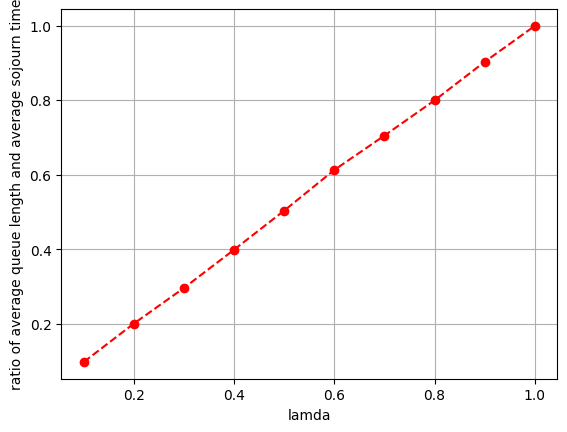

In [19]:
#Part c: Little's Theorem
#plotting the ration of average queue length and average sojourn time vs lamda
ratio = np.divide(average_q, average_sojourn_time)
print("Ratio of average queue length and average sojourn time vs lamda:")
for i in range(1, len(ratio)+1):
    print("lamda = ", i/10, ":", ratio[i-1])
plt.plot(lamda_range, ratio, 'ro--')
plt.xlabel('lamda')
plt.ylabel('ratio of average queue length and average sojourn time')
plt.grid()
plt.show()

This shows us an example of the Little's Theorem which states that the average queue length = average arrival rate * average sojourn time

m =  1.003942253485222 c =  -0.0006737634437831089


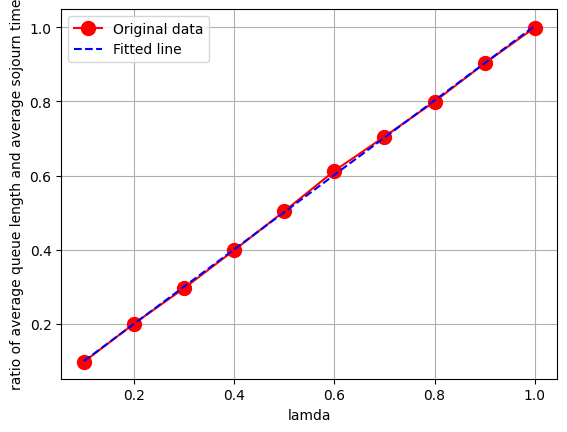

Mean squared error in percentage =  0.0018897117397618454


In [24]:
#Let us verify this by fitting a line to the plot
#We want to fit a least squares line to the data
#Fit a line y = mx + c to the data using numpy.linalg.lstsq
m, c = np.linalg.lstsq(np.vstack([lamda_range, np.ones(len(lamda_range))]).T, ratio, rcond = None)[0]
print("m = ", m, "c = ", c)
plt.plot(lamda_range, ratio, 'ro-', label='Original data', markersize=10)
plt.plot(lamda_range, m*lamda_range + c, 'b--', label='Fitted line')
plt.xlabel('lamda')
plt.ylabel('ratio of average queue length and average sojourn time')
plt.legend()
plt.grid()
plt.show()
#calculating mean squared error in percentage
mse = np.mean(np.square(np.subtract(ratio, m*lamda_range + c)))
print("Mean squared error in percentage = ", mse*100)


This proves the Little's Theorem that the average queue length = average arrival rate * average sojourn time.

Part (b): Comparing the expectation under a stationary distribution with the average queue length

We know that for a finite state Geo/Geo/1 queue, the stationary distribution is given by the following (for max n customers in the system):
Local balance equations:
Pi(i)lambda = Pi(i+1)mu for i = 0,1,2,...,n-1
implies
Pi(i+1) = Pi(i)lambda/mu for i = 0,1,2,...,n-1
Let Pi(i) = (1-p)p^i/(1-p^(n+1)) for i = 0,1,2,...,n
where p = lambda(1-mu)/mu(1-lambda)


Theoretical average queue length vs lamda:
lamda =  0.1 : 0.012499999999999997
lamda =  0.2 : 0.028571428571428564
lamda =  0.3 : 0.05
lamda =  0.4 : 0.07999999999999997
lamda =  0.5 : 0.12499999999999996
lamda =  0.6 : 0.1999999999999999
lamda =  0.7 : 0.3499999999999998
lamda =  0.8 : 0.8000000000000002
Simulated average queue length vs lamda:
lamda =  0.1 : 0.0132
lamda =  0.2 : 0.0267
lamda =  0.3 : 0.0484
lamda =  0.4 : 0.0837
lamda =  0.5 : 0.1307
lamda =  0.6 : 0.2203
lamda =  0.7 : 0.3396
lamda =  0.8 : 0.824


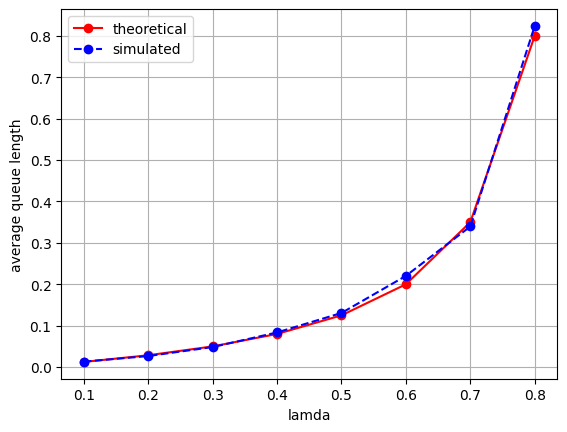

In [25]:
#part (b):
n = 1000 #max queue length
mu = 0.9

theoretical_average_q = []

for lamda in lamda_range[:-2]:
    p = lamda*(1-mu)/(mu*(1-lamda))
    Pi = np.zeros(n+1)
    #set Pi[0] = (1-p)(1-p**(n+1))
    Pi[0] = (1-p)/(1-p**(n+1))
    for i in range(1, n+1):
        Pi[i] = p**i*Pi[0]
    #Finding the expectation under the steady state distribution
    E = 0
    for i in range(n+1):
        E += i*Pi[i]
    theoretical_average_q.append(E)

print("Theoretical average queue length vs lamda:")
for i in range(1, len(theoretical_average_q)+1):
    print("lamda = ", i/10, ":", theoretical_average_q[i-1])

print("Simulated average queue length vs lamda:")
for i in range(1, len(average_q)-1):
    print("lamda = ", i/10, ":", average_q[i-1])

#plot theoretical average and simulated average on the same graph
plt.plot(lamda_range[:-2], theoretical_average_q, 'ro-', label='theoretical')
plt.plot(lamda_range[:-2], average_q[:-2], 'bo--', label='simulated')
plt.xlabel('lamda')
plt.ylabel('average queue length')
plt.legend()
plt.grid()
plt.show()